In [180]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, OneHotEncoder
from utils2 import *
import umap

### WARNINGS
import warnings
warnings.filterwarnings('ignore')

### AUTORELOAD
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [197]:
# data = pd.read_csv('Data\\New_Data\\project_data_cleaned_noreturnincons_impute2_wzipid_no0_out.csv')
# data = pd.read_csv('Data\\New_Data\\project_data_cleaned_noreturnincons_impute2_wzipid_no0_out_perc.csv')
data = pd.read_csv('Data\\New_Data\\project_data_cleaned_noreturnincons_impute2uni_wzipid_no0_out_perc.csv')
# data = pd.read_csv('Data\\New_Data\\project_data_cleaned_noreturnincons_impute2uni_wzipid_no0_out99_perc.csv')

In [198]:
preference_metrics = ['beer', 'bottled_water', 'bread', 'meat', 'dairy', 'fresh_foods', 'frozen_foods', 'fruit_beverages', 'pastry', 'sodas', 'toiletries', 'veggies', 'wines']
preference_metrics_perc = ['percentage_beer', 'percentage_bottled_water', 'percentage_bread', 'percentage_meat', 'percentage_dairy', 'percentage_fresh_foods', 'percentage_frozen_foods', 'percentage_fruit_beverages', 'percentage_pastry', 'percentage_sodas', 'percentage_toiletries', 'percentage_veggies', 'percentage_wines']
demographic_metrics = ['frequency_items', 'potencial_score', 'zip_code', 'longevity_months', 'credit_factor', 'relevance_criteria', 'recency_in_weeks', 'returns', 'flaged', 'promotional_percentage']

In [199]:
preference = data[preference_metrics]
preference_perc = data[preference_metrics_perc]
demographic = data[demographic_metrics]

Scale the data

In [200]:
standard = StandardScaler()
minmax = MinMaxScaler()
robust = RobustScaler()

# Preference Clustering

In [201]:
pref_no_scl = preference.copy()
pref_st_scl = standard.fit_transform(preference)
pref_mm_scl = minmax.fit_transform(preference)
pref_rb_scl = robust.fit_transform(preference)

In [202]:
preference_no_scl = preference.copy()
preference_no_scl[preference_metrics] = pref_no_scl

preference_st_scl = preference.copy()
preference_st_scl[preference_metrics] = pref_st_scl

preference_mm_scl = preference.copy()
preference_mm_scl[preference_metrics] = pref_mm_scl

preference_rb_scl = preference.copy()
preference_rb_scl[preference_metrics] = pref_rb_scl

## Compare test

In [38]:
kmeans = KMeans(init='k-means++', n_init=10, random_state=1)

hierarchical = AgglomerativeClustering(metric='euclidean')

In [203]:
sample_original = preference.sample(frac=0.2, random_state=1)
sample_no_scl = preference.sample(frac=0.2, random_state=1)
sample_st_scl = preference_st_scl.sample(frac=0.2, random_state=1)
sample_mm_scl = preference_mm_scl.sample(frac=0.2, random_state=1)
sample_rb_scl = preference_rb_scl.sample(frac=0.2, random_state=1)

### No Scale

In [29]:
pref_no_r2_scores = get_r2_df(sample_no_scl, preference_metrics, kmeans, hierarchical)
pref_no_r2_scores

,kmeans,complete,average,single,ward
2,0.209067,0.068736,0.047354,0.012925,0.203203
3,0.342505,0.118816,0.088826,0.021430,0.329536
4,0.463942,0.142149,0.101269,0.058423,0.446964
5,0.519972,0.152609,0.103833,0.059501,0.504819
6,0.564152,0.155512,0.136137,0.063208,0.547396
7,0.598549,0.185927,0.137951,0.070385,0.581309
8,0.625062,0.219119,0.142038,0.075443,0.609937
9,0.646258,0.221380,0.160528,0.095983,0.630129


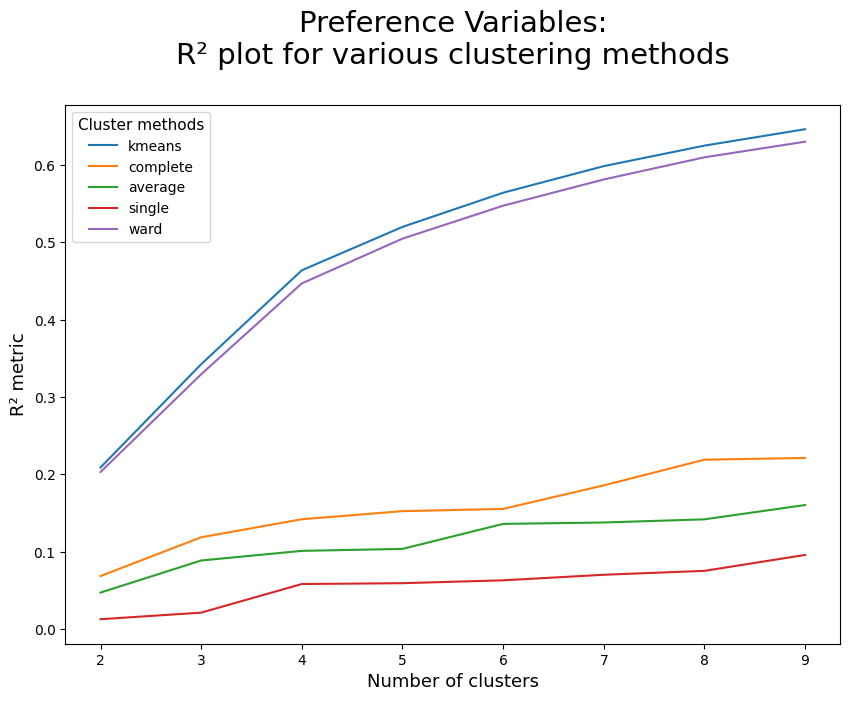

In [30]:
plot_r2_scores(pref_no_r2_scores)

Kmeans and ward hierarchical clustering are the best algorithms to perfrom clustering in the non scaled data. A good number of clusters could be 4, 7 or 8.

### Standard Scaler

In [21]:
pref_st_r2_scores = get_r2_df(sample_st_scl, preference_metrics, kmeans, hierarchical)
pref_st_r2_scores

,kmeans,complete,average,single,ward
2,0.176049,0.048850,0.045462,0.016811,0.164629
3,0.301977,0.107143,0.049207,0.049207,0.285833
4,0.416004,0.116155,0.084098,0.051366,0.387226
5,0.457385,0.169172,0.128282,0.059260,0.437869
6,0.496877,0.174781,0.130441,0.064994,0.477108
7,0.535721,0.184042,0.132329,0.068645,0.514901
8,0.557773,0.208795,0.151580,0.071646,0.541589
9,0.580423,0.210447,0.153282,0.076663,0.560923


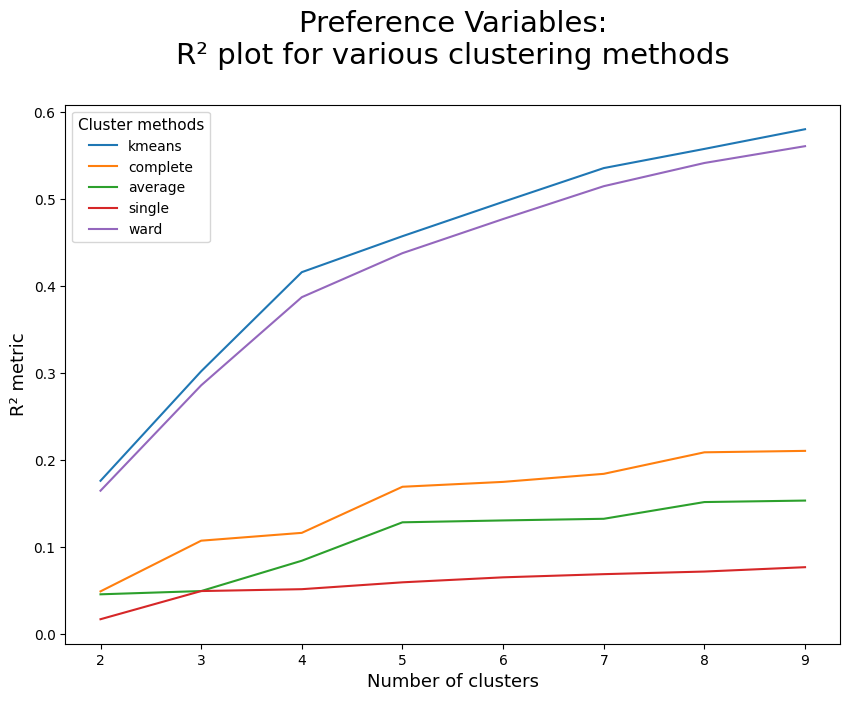

In [22]:
plot_r2_scores(pref_st_r2_scores)

Kmeans and ward hierarchical clustering are the best algorithms to perfrom clustering in the standard scaled data. A good number of clusters could be 4 or 7.

### MinMax Scaler

In [23]:
pref_mm_r2_scores = get_r2_df(sample_mm_scl, preference_metrics, kmeans, hierarchical)
pref_mm_r2_scores

,kmeans,complete,average,single,ward
2,0.338506,0.012665,0.003820,0.003486,0.331962
3,0.462601,0.016152,0.007305,0.007305,0.453879
4,0.509186,0.037954,0.023393,0.010608,0.499427
5,0.549118,0.049700,0.024939,0.016795,0.538259
6,0.583593,0.067551,0.028990,0.018340,0.566221
7,0.612405,0.073591,0.031174,0.019840,0.588611
8,0.634413,0.081367,0.039272,0.022728,0.607226
9,0.652855,0.082471,0.040216,0.023691,0.622645


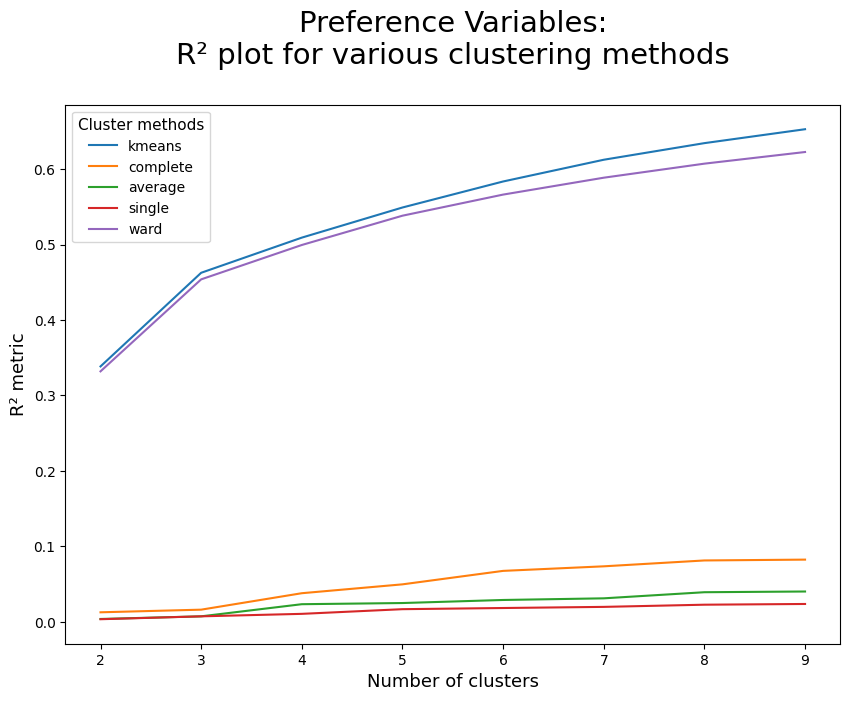

In [24]:
plot_r2_scores(pref_mm_r2_scores)

Kmeans and ward hierarchical clustering are the best algorithms to perfrom clustering in the minmax scaled data. A good number of clusters could be 3, 5 or 7.

### Robust Scaler

In [25]:
pref_rb_r2_scores = get_r2_df(sample_rb_scl, preference_metrics, kmeans, hierarchical)
pref_rb_r2_scores

,kmeans,complete,average,single,ward
2,0.702740,0.273798,0.545504,0.123491,0.616286
3,0.839110,0.767618,0.567666,0.124063,0.831383
4,0.890117,0.774844,0.851447,0.281597,0.883647
5,0.920766,0.805961,0.861150,0.281957,0.914842
6,0.941285,0.921168,0.884986,0.282113,0.939480
7,0.948956,0.922675,0.885558,0.316268,0.946707
8,0.956947,0.932466,0.889455,0.316373,0.952810
9,0.962334,0.936236,0.895934,0.579313,0.958567


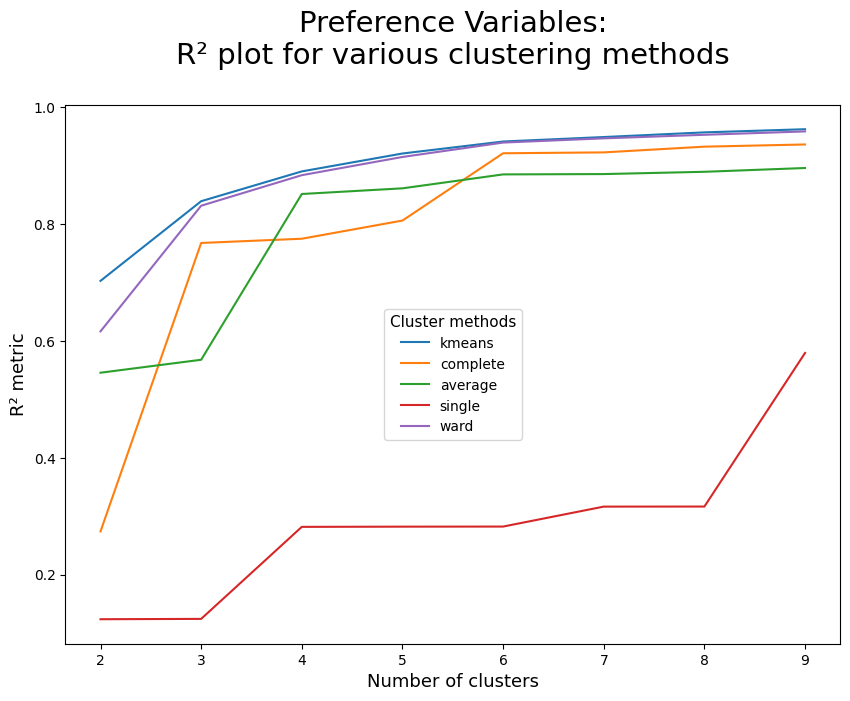

In [26]:
plot_r2_scores(pref_rb_r2_scores)

Kmeans and ward hierarchical clustering are the best algorithms to perfrom clustering in the robust scaled data, although with this scaler hierarchical clustering with complete and average linkage are also good. A good number of clusters could be 3, 4 or 6.

With these results we are going to continue testing only with kmeans and ward linkage hierarchical clustering.

## K-Means

### No Scale

#### 95%

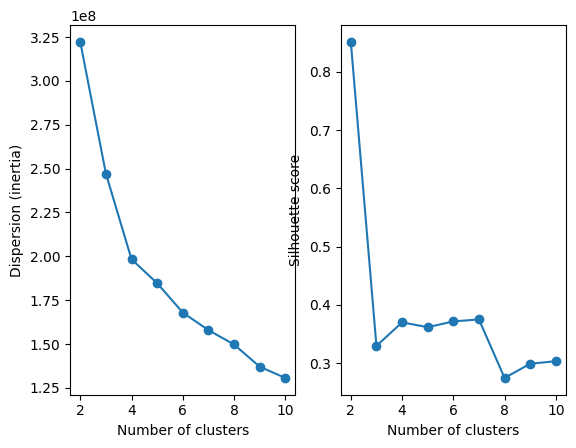

In [31]:
plot_inertia_and_silhouette(sample_no_scl, 2, 10)

In [40]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=10,  random_state = 1).fit(preference_no_scl)
preference['no_kmeans4'] = kmeans.predict(preference_no_scl)

In [39]:
kmeans = KMeans(n_clusters = 6, init='k-means++', n_init=10,  random_state = 1).fit(preference_no_scl)
preference['no_kmeans6'] = kmeans.predict(preference_no_scl)

In [41]:
groupby_mean(preference, 'no_kmeans4')

no_kmeans4,0,1,2,3,data
beer,84.42,46.53,45.38,142.43,58.82
bottled_water,83.39,45.04,44.81,56.79,57.52
bread,30.51,31.14,22.09,147.50,28.44
meat,1.71,2.28,1.13,332.10,2.69
dairy,30.86,31.25,77.20,394.52,46.55
fresh_foods,33.55,110.10,32.59,202.26,61.12
frozen_foods,113.14,64.97,31.75,383.38,71.22
fruit_beverages,21.19,96.68,20.47,153.85,48.35
pastry,31.53,63.39,56.29,58.06,50.75
sodas,34.05,34.66,33.66,519.92,35.55


In [42]:
groupby_mean(preference, 'no_kmeans6')

no_kmeans6,0,1,2,3,4,5,data
beer,46.48,84.43,45.34,46.20,178.12,107.67,58.82
bottled_water,45.15,83.54,44.78,45.09,57.33,59.52,57.52
bread,30.87,30.32,22.00,30.55,114.94,128.61,28.44
meat,1.99,1.31,1.12,1.78,343.66,169.25,2.69
dairy,31.15,30.59,77.49,30.96,578.89,129.97,46.55
fresh_foods,109.37,32.91,32.41,108.43,192.88,199.78,61.12
frozen_foods,84.31,110.77,31.70,32.99,311.61,431.74,71.22
fruit_beverages,96.54,20.68,20.42,94.37,147.48,146.25,48.35
pastry,31.03,31.36,55.32,117.04,56.18,52.94,50.75
sodas,34.23,33.92,33.57,35.16,765.07,135.74,35.55


In [43]:
clusters_comparison(preference, 'no_kmeans4', 'no_kmeans6')

,no_kmeans6 0 Cluster,no_kmeans6 1 Cluster,no_kmeans6 2 Cluster,no_kmeans6 3 Cluster,no_kmeans6 4 Cluster,no_kmeans6 5 Cluster
no_kmeans4 0 Cluster,153,39692,1,27,0,201
no_kmeans4 1 Cluster,27019,3,7,16717,0,162
no_kmeans4 2 Cluster,4,1,38106,298,0,1
no_kmeans4 3 Cluster,1,3,5,5,178,162


#### 99%

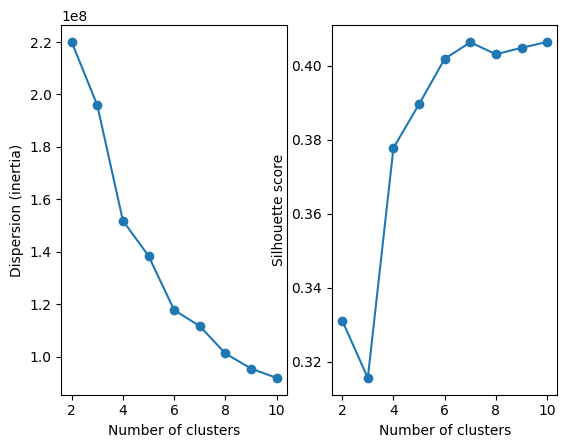

In [140]:
plot_inertia_and_silhouette(sample_no_scl, 2, 10)

In [141]:
kmeans = KMeans(n_clusters = 6, init='k-means++', n_init=10,  random_state = 1).fit(preference_no_scl)
preference['no_kmeans6'] = kmeans.predict(preference_no_scl)

In [142]:
kmeans = KMeans(n_clusters = 7, init='k-means++', n_init=10,  random_state = 1).fit(preference_no_scl)
preference['no_kmeans7'] = kmeans.predict(preference_no_scl)

In [143]:
groupby_mean(preference, 'no_kmeans6')

no_kmeans6,0,1,2,3,4,5,data
beer,45.38,46.48,84.24,45.72,45.78,109.78,58.55
bottled_water,44.76,45.11,83.52,45.15,44.79,57.95,57.47
bread,18.60,30.92,30.25,30.05,30.29,85.10,28.07
meat,1.09,2.08,1.25,1.05,1.46,193.60,2.22
dairy,83.93,31.03,30.48,61.07,30.51,245.35,46.14
fresh_foods,32.64,109.37,32.92,32.50,108.66,166.10,60.61
frozen_foods,31.72,84.88,111.27,32.64,32.32,321.97,70.63
fruit_beverages,20.49,96.36,20.68,20.41,95.63,127.25,48.01
pastry,30.61,31.07,31.12,114.86,113.96,53.61,50.44
sodas,33.26,33.95,33.60,33.80,33.92,325.51,34.90


0: dairy | 1: freshfood&fruitbeverage | 2: beer&water&frozen | 3: pastry&(dairy&wine) | 4: freshfood&fruitbeverage&pastry | 5: spenders

In [144]:
groupby_mean(preference, 'no_kmeans7')

no_kmeans7,0,1,2,3,4,5,6,data
beer,45.37,45.75,84.21,45.71,45.77,47.22,110.98,58.55
bottled_water,44.75,44.78,83.55,45.15,44.78,45.47,57.78,57.47
bread,18.60,30.27,30.20,30.05,30.34,31.32,87.49,28.07
meat,1.09,1.40,1.19,1.04,1.25,2.75,200.65,2.22
dairy,83.92,30.47,30.40,61.06,30.84,31.49,253.17,46.14
fresh_foods,32.57,108.59,32.73,32.49,108.39,109.98,166.86,60.61
frozen_foods,31.73,32.33,110.91,32.63,31.75,113.44,317.35,70.63
fruit_beverages,20.46,95.65,20.54,20.40,95.37,96.71,126.74,48.01
pastry,30.61,114.42,31.09,114.86,30.63,31.66,53.80,50.44
sodas,33.25,33.82,33.56,33.80,33.58,34.46,335.83,34.90


0: dairy | 1: freshfood&fruitbeverage&pastry | 2: beer&water&frozen | 3: pastry&(dairy&wine) | 4: freshfood&fruitbeverage | 5: freshfood&frozenfood&fruitbeverage | 6: spenders

### Standard Scaler

#### 95%

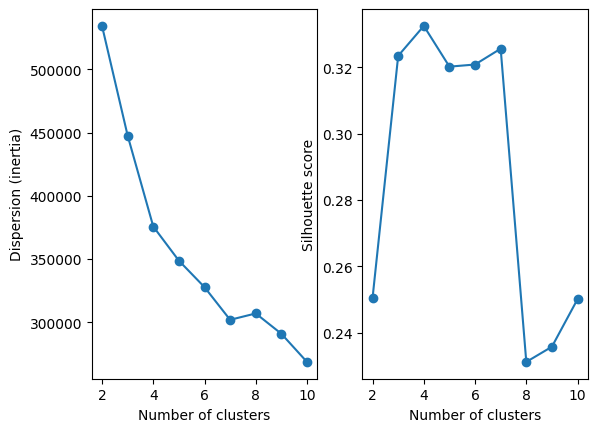

In [ ]:
plot_inertia_and_silhouette(sample_st_scl, 2, 10)

In [44]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=10,  random_state = 1).fit(preference_st_scl)
preference['st_kmeans4'] = kmeans.predict(preference_st_scl)

In [45]:
kmeans = KMeans(n_clusters = 7, init='k-means++', n_init=10,  random_state = 1).fit(preference_st_scl)
preference['st_kmeans7'] = kmeans.predict(preference_st_scl)

In [46]:
groupby_mean(preference, 'st_kmeans4')

st_kmeans4,0,1,2,3,data
beer,45.96,85.30,136.56,45.31,58.82
bottled_water,44.83,84.07,57.09,44.73,57.52
bread,30.47,30.41,197.29,22.06,28.44
meat,1.77,1.44,311.77,1.20,2.69
dairy,30.91,30.67,318.45,77.06,46.55
fresh_foods,109.33,33.92,208.96,32.74,61.12
frozen_foods,65.10,112.85,281.68,33.04,71.22
fruit_beverages,96.41,21.27,150.49,20.57,48.35
pastry,63.47,31.68,52.90,55.87,50.75
sodas,34.32,34.21,400.10,33.84,35.55


In [47]:
groupby_mean(preference, 'st_kmeans7')

st_kmeans7,0,1,2,3,4,5,6,data
beer,45.64,85.32,46.07,46.19,45.27,151.65,110.68,58.82
bottled_water,44.89,84.09,45.31,44.87,44.66,57.38,55.90,57.52
bread,30.04,30.33,28.54,30.64,16.65,79.36,422.41,28.44
meat,1.26,1.40,2.14,2.16,1.03,330.56,274.84,2.69
dairy,31.27,30.51,83.99,31.26,82.44,474.20,88.88,46.55
fresh_foods,91.29,33.68,34.90,109.84,32.17,201.39,221.32,61.12
frozen_foods,32.79,112.50,34.38,85.52,33.46,337.93,175.36,71.22
fruit_beverages,77.88,21.11,21.82,97.51,20.35,162.34,121.96,48.35
pastry,116.25,31.34,62.25,31.34,38.21,54.65,50.05,50.75
sodas,34.05,33.96,35.68,34.38,33.38,528.48,230.67,35.55


In [48]:
clusters_comparison(preference, 'st_kmeans4', 'st_kmeans7')

,st_kmeans7 0 Cluster,st_kmeans7 1 Cluster,st_kmeans7 2 Cluster,st_kmeans7 3 Cluster,st_kmeans7 4 Cluster,st_kmeans7 5 Cluster,st_kmeans7 6 Cluster
st_kmeans4 0 Cluster,16616,1,108,27035,12,0,6
st_kmeans4 1 Cluster,53,39401,116,50,26,1,6
st_kmeans4 2 Cluster,0,12,10,22,0,276,156
st_kmeans4 3 Cluster,4855,5,12685,17,21273,4,0


In [52]:
clusters_comparison(preference, 'no_kmeans4', 'st_kmeans4')

,st_kmeans4 0 Cluster,st_kmeans4 1 Cluster,st_kmeans4 2 Cluster,st_kmeans4 3 Cluster
no_kmeans4 0 Cluster,135,39363,47,529
no_kmeans4 1 Cluster,43510,189,97,112
no_kmeans4 2 Cluster,127,78,15,38190
no_kmeans4 3 Cluster,6,23,317,8


In [53]:
clusters_comparison(preference, 'no_kmeans6', 'st_kmeans7')

,st_kmeans7 0 Cluster,st_kmeans7 1 Cluster,st_kmeans7 2 Cluster,st_kmeans7 3 Cluster,st_kmeans7 4 Cluster,st_kmeans7 5 Cluster,st_kmeans7 6 Cluster
no_kmeans6 0 Cluster,48,184,121,26778,21,0,25
no_kmeans6 1 Cluster,36,39028,133,34,448,1,19
no_kmeans6 2 Cluster,4703,36,12520,6,20836,9,9
no_kmeans6 3 Cluster,16733,28,124,145,2,4,11
no_kmeans6 4 Cluster,1,1,0,1,1,166,8
no_kmeans6 5 Cluster,3,142,21,160,3,101,96


#### 99%

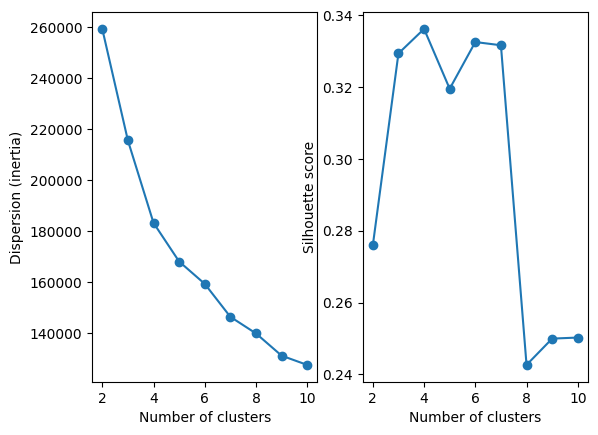

In [145]:
plot_inertia_and_silhouette(sample_st_scl, 2, 10)

In [148]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=10,  random_state = 1).fit(preference_st_scl)
preference['st_kmeans4'] = kmeans.predict(preference_st_scl)

In [149]:
kmeans = KMeans(n_clusters = 6, init='k-means++', n_init=10,  random_state = 1).fit(preference_st_scl)
preference['st_kmeans6'] = kmeans.predict(preference_st_scl)

In [150]:
groupby_mean(preference, 'st_kmeans4')

st_kmeans4,0,1,2,3,data
beer,45.31,85.00,112.95,45.73,58.55
bottled_water,44.72,83.92,57.51,44.80,57.47
bread,21.93,30.27,135.79,30.34,28.07
meat,1.08,1.28,245.27,1.45,2.22
dairy,77.30,30.52,248.90,30.61,46.14
fresh_foods,32.62,33.69,174.84,108.35,60.61
frozen_foods,32.84,112.11,237.87,64.62,70.63
fruit_beverages,20.51,21.14,130.47,95.63,48.01
pastry,55.31,31.60,52.73,63.14,50.44
sodas,33.56,33.93,308.50,34.01,34.90


0: dairy&pastry | 1: beer&water&frozen | 2: spenders | 3: freshfood&fruitbeverage

In [151]:
groupby_mean(preference, 'st_kmeans6')

st_kmeans6,0,1,2,3,4,5,data
beer,84.97,45.53,113.97,45.89,45.91,45.30,58.55
bottled_water,83.95,44.82,57.48,44.85,45.14,44.68,57.47
bread,30.23,30.00,138.96,30.45,28.45,16.33,28.07
meat,1.23,1.07,249.02,1.65,1.58,1.03,2.22
dairy,30.40,31.16,249.76,30.82,83.87,83.27,46.14
fresh_foods,33.45,90.14,176.34,109.02,34.29,32.35,60.61
frozen_foods,111.74,32.57,239.31,85.07,33.82,33.13,70.63
fruit_beverages,20.98,77.31,130.94,96.54,21.47,20.47,48.01
pastry,31.29,114.82,52.89,31.20,62.39,37.26,50.44
sodas,33.76,33.70,312.13,34.06,34.88,33.35,34.90


0: beer&water&frozenfood | 1: pastry | 2: spenders | 3: freshfood&fruitbeverage | 4: dairy&pastry&wines&veggies | 5: dairy

### MinMax Scaler

#### 95%

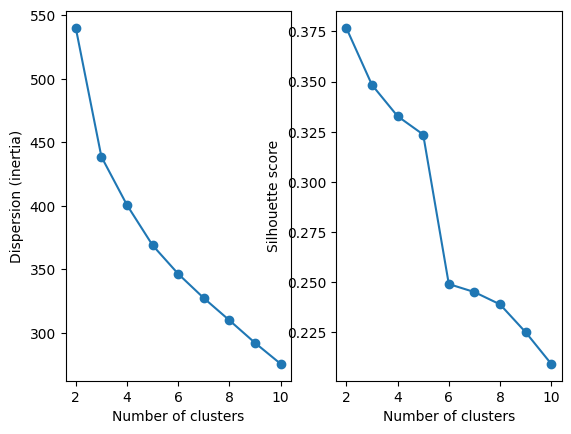

In [32]:
plot_inertia_and_silhouette(sample_mm_scl, 2, 10)

In [54]:
kmeans = KMeans(n_clusters = 3, init='k-means++', n_init=10,  random_state = 1).fit(preference_mm_scl)
preference['mm_kmeans3'] = kmeans.predict(preference_mm_scl)

In [55]:
kmeans = KMeans(n_clusters = 5, init='k-means++', n_init=10,  random_state = 1).fit(preference_mm_scl)
preference['mm_kmeans5'] = kmeans.predict(preference_mm_scl)

In [56]:
groupby_mean(preference, 'mm_kmeans3')

mm_kmeans3,0,1,2,data
beer,46.91,85.16,45.48,58.82
bottled_water,44.78,84.34,44.65,57.52
bread,31.81,30.66,22.35,28.44
meat,4.25,2.21,1.40,2.69
dairy,33.39,31.46,76.79,46.55
fresh_foods,110.62,34.05,32.68,61.12
frozen_foods,67.60,111.87,33.95,71.22
fruit_beverages,97.26,21.33,20.52,48.35
pastry,63.17,31.80,55.99,50.75
sodas,36.92,35.35,34.19,35.55


In [57]:
groupby_mean(preference, 'mm_kmeans5')

mm_kmeans5,0,1,2,3,4,data
beer,46.56,85.09,45.98,45.38,47.21,58.82
bottled_water,44.78,84.36,44.83,44.62,44.84,57.52
bread,31.14,30.59,28.48,19.31,32.22,28.44
meat,3.06,2.05,2.69,1.03,4.93,2.69
dairy,32.10,31.32,84.15,73.42,34.24,46.55
fresh_foods,109.29,33.92,34.01,32.22,110.78,61.12
frozen_foods,35.01,111.69,35.49,33.58,87.65,71.22
fruit_beverages,95.22,21.23,21.45,20.26,97.84,48.35
pastry,116.80,31.62,60.69,52.39,31.29,50.75
sodas,36.38,35.14,35.92,33.64,37.25,35.55


In [58]:
clusters_comparison(preference, 'mm_kmeans3', 'mm_kmeans5')

,mm_kmeans5 0 Cluster,mm_kmeans5 1 Cluster,mm_kmeans5 2 Cluster,mm_kmeans5 3 Cluster,mm_kmeans5 4 Cluster
mm_kmeans3 0 Cluster,16649,0,81,19,27345
mm_kmeans3 1 Cluster,21,39566,47,10,21
mm_kmeans3 2 Cluster,262,1,12923,25779,22


#### 99%

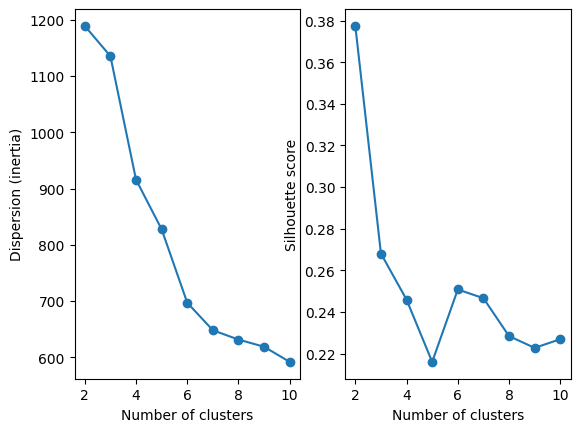

In [152]:
plot_inertia_and_silhouette(sample_mm_scl, 2, 10)

In [153]:
kmeans = KMeans(n_clusters = 6, init='k-means++', n_init=10,  random_state = 1).fit(preference_mm_scl)
preference['mm_kmeans3'] = kmeans.predict(preference_mm_scl)

In [154]:
groupby_mean(preference, 'st_kmeans6')

st_kmeans6,0,1,2,3,4,5,data
beer,84.97,45.53,113.97,45.89,45.91,45.30,58.55
bottled_water,83.95,44.82,57.48,44.85,45.14,44.68,57.47
bread,30.23,30.00,138.96,30.45,28.45,16.33,28.07
meat,1.23,1.07,249.02,1.65,1.58,1.03,2.22
dairy,30.40,31.16,249.76,30.82,83.87,83.27,46.14
fresh_foods,33.45,90.14,176.34,109.02,34.29,32.35,60.61
frozen_foods,111.74,32.57,239.31,85.07,33.82,33.13,70.63
fruit_beverages,20.98,77.31,130.94,96.54,21.47,20.47,48.01
pastry,31.29,114.82,52.89,31.20,62.39,37.26,50.44
sodas,33.76,33.70,312.13,34.06,34.88,33.35,34.90


0: beer&water&frozenfood | 1: pastry&(freshfood) | 2: spenders | 3: freshfood&fruitbeverage | 4: dairy&pastry&veggies&wines | 5: dairy

### Robust Scaler

#### 95%

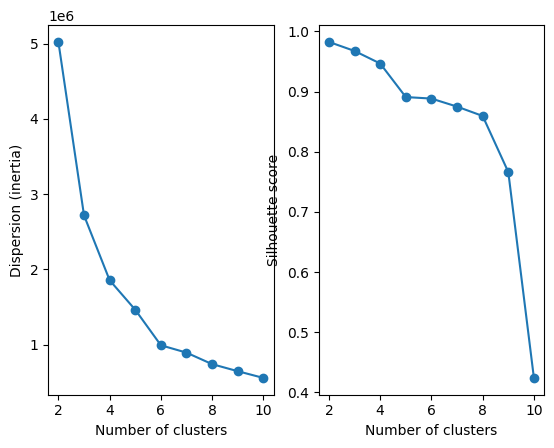

In [33]:
plot_inertia_and_silhouette(sample_rb_scl, 2, 10)

In [60]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=10,  random_state = 1).fit(preference_rb_scl)
preference['rb_kmeans4'] = kmeans.predict(preference_rb_scl)

In [61]:
kmeans = KMeans(n_clusters = 6, init='k-means++', n_init=10,  random_state = 1).fit(preference_rb_scl)
preference['rb_kmeans6'] = kmeans.predict(preference_rb_scl)

In [62]:
groupby_mean(preference, 'rb_kmeans4')

rb_kmeans4,0,1,2,3,data
beer,58.37,86.72,113.00,145.83,58.82
bottled_water,57.52,58.39,57.57,55.56,57.52
bread,27.69,65.95,133.42,226.62,28.44
meat,0.76,85.64,281.24,621.32,2.69
dairy,45.12,117.52,255.06,408.93,46.55
fresh_foods,60.06,127.72,197.39,246.08,61.12
frozen_foods,69.82,154.72,248.18,370.00,71.22
fruit_beverages,47.64,93.34,132.36,191.55,48.35
pastry,50.66,60.75,53.40,54.50,50.75
sodas,33.74,125.48,295.08,511.91,35.55


In [63]:
groupby_mean(preference, 'rb_kmeans6')

rb_kmeans6,0,1,2,3,4,5,data
beer,58.28,142.49,95.60,173.67,79.02,122.65,58.82
bottled_water,57.52,55.42,58.11,56.75,57.93,57.63,57.52
bread,27.60,196.52,92.83,477.42,52.05,138.96,28.44
meat,0.58,572.28,150.61,1030.00,50.79,322.28,2.69
dairy,45.02,412.93,179.09,375.58,79.95,287.52,46.55
fresh_foods,59.91,227.23,157.23,403.17,104.98,201.52,61.12
frozen_foods,69.61,388.24,193.39,218.00,125.62,269.94,71.22
fruit_beverages,47.53,199.31,112.34,126.92,78.94,128.26,48.35
pastry,50.63,55.10,55.50,49.50,59.09,54.22,50.75
sodas,33.56,428.78,201.60,1204.67,80.27,350.78,35.55


Robust Scaler tends to give poor resunts, combining the majority of data points into a huge cluster while the remaining datapoints belonging to other very small clusters. For this reason, this scaler will be excluded from the analysis.

-----

#### 99%

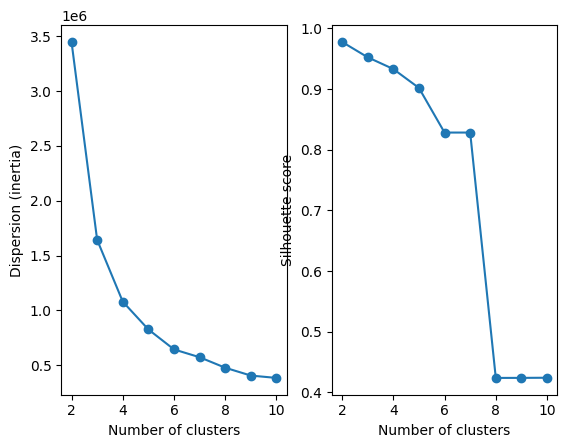

In [155]:
plot_inertia_and_silhouette(sample_rb_scl, 2, 10)

In [156]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=10,  random_state = 1).fit(preference_rb_scl)
preference['rb_kmeans4'] = kmeans.predict(preference_rb_scl)

In [157]:
kmeans = KMeans(n_clusters = 6, init='k-means++', n_init=10,  random_state = 1).fit(preference_rb_scl)
preference['rb_kmeans6'] = kmeans.predict(preference_rb_scl)

In [158]:
groupby_mean(preference, 'st_kmeans4')

st_kmeans4,0,1,2,3,data
beer,45.31,85.00,112.95,45.73,58.55
bottled_water,44.72,83.92,57.51,44.80,57.47
bread,21.93,30.27,135.79,30.34,28.07
meat,1.08,1.28,245.27,1.45,2.22
dairy,77.30,30.52,248.90,30.61,46.14
fresh_foods,32.62,33.69,174.84,108.35,60.61
frozen_foods,32.84,112.11,237.87,64.62,70.63
fruit_beverages,20.51,21.14,130.47,95.63,48.01
pastry,55.31,31.60,52.73,63.14,50.44
sodas,33.56,33.93,308.50,34.01,34.90


0: dairy | 1: beer&water&frozen | 2: spenders | 3: freshfood&fruitbeverage&lowwine

In [159]:
groupby_mean(preference, 'st_kmeans6')

st_kmeans6,0,1,2,3,4,5,data
beer,84.97,45.53,113.97,45.89,45.91,45.30,58.55
bottled_water,83.95,44.82,57.48,44.85,45.14,44.68,57.47
bread,30.23,30.00,138.96,30.45,28.45,16.33,28.07
meat,1.23,1.07,249.02,1.65,1.58,1.03,2.22
dairy,30.40,31.16,249.76,30.82,83.87,83.27,46.14
fresh_foods,33.45,90.14,176.34,109.02,34.29,32.35,60.61
frozen_foods,111.74,32.57,239.31,85.07,33.82,33.13,70.63
fruit_beverages,20.98,77.31,130.94,96.54,21.47,20.47,48.01
pastry,31.29,114.82,52.89,31.20,62.39,37.26,50.44
sodas,33.76,33.70,312.13,34.06,34.88,33.35,34.90


0: beew&water&frozenfood | 1: pastry | 2: spenders | 3: freshfood&fruitbeverage | 4: dairy&pastry&veggies&wine | 5: dairy

## Hierarchical

### No Scaler

#### 95%

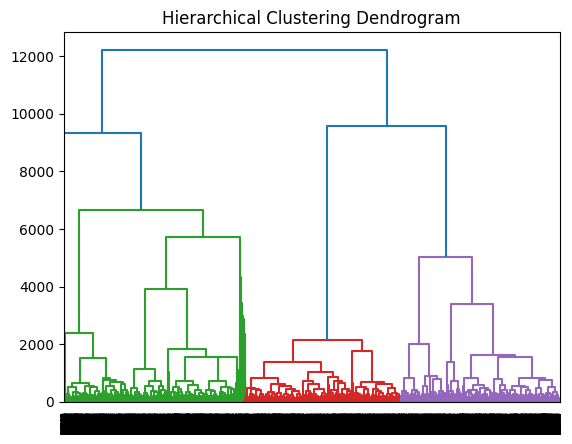

In [204]:
plot_dendrogram(sample_no_scl, 'ward', preference_metrics) # 95%

In [205]:
sample_original['no_ward4'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 4
    ).fit_predict(sample_no_scl)

In [206]:
sample_original['no_ward6'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 6
    ).fit_predict(sample_no_scl)

In [207]:
sample_original['no_ward7'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters =7
    ).fit_predict(sample_no_scl)

In [208]:
groupby_mean(sample_original, 'no_ward4')

no_ward4,0,1,2,3,data
beer,47.87,45.43,84.24,183.87,58.74
bottled_water,45.91,45.01,83.63,53.60,57.46
bread,32.35,21.90,29.86,121.29,28.40
meat,4.18,0.87,0.72,363.73,2.70
dairy,32.59,76.38,29.83,592.82,46.73
fresh_foods,109.08,33.13,32.57,211.51,61.03
frozen_foods,70.48,31.96,109.07,369.60,70.83
fruit_beverages,95.32,20.75,20.30,179.53,48.14
pastry,62.73,55.24,31.39,60.13,50.51
sodas,36.96,32.74,32.69,663.02,35.42


0: freshfood&fruitbeverage&(pastry)&lowwine | 1: normal(dairy) | 2: beer&water&frozen | spenders

In [211]:
groupby_mean(sample_original, 'no_ward6')

no_ward6,0,1,2,3,4,5,data
beer,45.43,90.76,47.15,183.87,45.50,84.24,58.74
bottled_water,45.01,65.34,45.58,53.60,44.84,83.63,57.46
bread,21.90,102.12,30.35,121.29,29.87,29.86,28.40
meat,0.87,87.68,1.74,363.73,1.31,0.72,2.70
dairy,76.38,91.86,30.97,592.82,30.34,29.83,46.73
fresh_foods,33.13,149.71,107.52,211.51,108.30,32.57,61.03
frozen_foods,31.96,242.57,84.57,369.60,32.12,109.07,70.83
fruit_beverages,20.75,85.00,95.79,179.53,95.37,20.30,48.14
pastry,55.24,57.04,31.57,60.13,116.04,31.39,50.51
sodas,32.74,145.23,33.70,663.02,33.39,32.69,35.42


0: normal(dairy) | 1: moderate spenders | 2: freshfood&fruitbeverage | 3: high spenders | 4: freshfood&fruitbeverage&pastry | 5: beer&water&frozen

In [209]:
groupby_mean(sample_original, 'no_ward7')

no_ward7,0,1,2,3,4,5,6,data
beer,90.76,183.87,47.15,45.60,45.50,84.24,45.00,58.74
bottled_water,65.34,53.60,45.58,45.08,44.84,83.63,44.81,57.46
bread,102.12,121.29,30.35,18.76,29.87,29.86,29.58,28.40
meat,87.68,363.73,1.74,0.96,1.31,0.72,0.64,2.70
dairy,91.86,592.82,30.97,83.24,30.34,29.83,59.60,46.73
fresh_foods,149.71,211.51,107.52,33.46,108.30,32.57,32.31,61.03
frozen_foods,242.57,369.60,84.57,32.21,32.12,109.07,31.36,70.83
fruit_beverages,85.00,179.53,95.79,20.99,95.37,20.30,20.15,48.14
pastry,57.04,60.13,31.57,31.08,116.04,31.39,114.30,50.51
sodas,145.23,663.02,33.70,32.79,33.39,32.69,32.60,35.42


0: moderate spenders | 1: high spenders | 2: freshfood&fruitbeverage | 3: normal(dairy) | 4: freshfood&fruitbeverage&pastry | 5: beer&water&frozen | 6: pastry

#### 99%

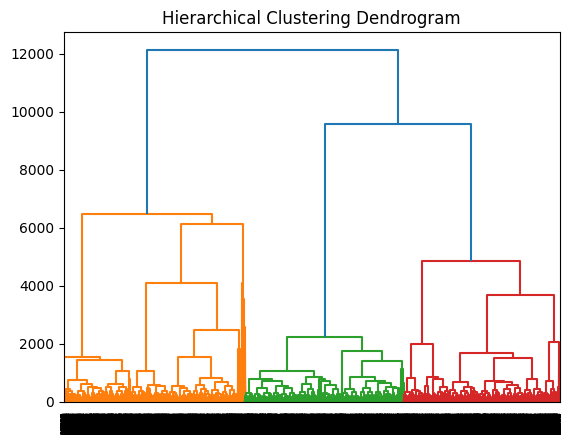

In [64]:
plot_dendrogram(sample_no_scl, 'ward') ## 99 outliers

In [120]:
sample_original['no_ward3'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 3
    ).fit_predict(sample_no_scl)

In [121]:
sample_original['no_ward5'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 5
    ).fit_predict(sample_no_scl)

In [126]:
sample_original['no_ward6'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 6
    ).fit_predict(sample_no_scl)

In [122]:
groupby_mean(sample_original, 'no_ward3')

no_ward3,0,1,2,data
beer,46.93,45.33,84.39,58.45
bottled_water,45.25,44.98,83.37,57.39
bread,31.66,21.78,30.22,28.10
meat,4.45,0.76,1.12,2.23
dairy,33.84,76.47,30.70,46.18
fresh_foods,108.67,32.53,33.40,60.69
frozen_foods,69.17,32.13,109.84,70.62
fruit_beverages,95.72,20.74,21.13,48.31
pastry,62.46,54.77,31.22,50.03
sodas,38.36,32.49,32.43,34.62


0: freshfood&fruitbeverage&lowwine | 1: dairy&(wine) | 2: beer&water&frozenfood

In [123]:
groupby_mean(sample_original, 'no_ward5')

no_ward5,0,1,2,3,4,data
beer,45.33,93.35,84.39,45.51,46.31,58.45
bottled_water,44.98,59.71,83.37,44.77,45.08,57.39
bread,21.78,98.47,30.22,29.85,30.63,28.10
meat,0.76,132.64,1.12,1.52,2.15,2.23
dairy,76.47,163.93,30.70,31.06,31.39,46.18
fresh_foods,32.53,128.30,33.40,107.40,108.82,60.69
frozen_foods,32.13,217.85,109.84,33.67,85.85,70.62
fruit_beverages,20.74,91.93,21.13,93.80,97.00,48.31
pastry,54.77,52.38,31.22,114.57,31.40,50.03
sodas,32.49,261.38,32.43,33.95,33.97,34.62


0: normal | 1: pseudosependers | 2: beer&water&frozenfood | 3: freshfood&fruitbeverage&pastry | 4: freshfood&fruitbeverage

In [127]:
groupby_mean(sample_original, 'no_ward6')

no_ward6,0,1,2,3,4,5,data
beer,93.35,46.31,84.39,45.51,45.27,45.47,58.45
bottled_water,59.71,45.08,83.37,44.77,45.03,44.86,57.39
bread,98.47,30.63,30.22,29.85,18.57,29.71,28.10
meat,132.64,2.15,1.12,1.52,0.78,0.73,2.23
dairy,163.93,31.39,30.70,31.06,82.92,60.54,46.18
fresh_foods,128.30,108.82,33.40,107.40,32.91,31.62,60.69
frozen_foods,217.85,85.85,109.84,33.67,32.35,31.58,70.62
fruit_beverages,91.93,97.00,21.13,93.80,20.94,20.24,48.31
pastry,52.38,31.40,31.22,114.57,31.19,113.00,50.03
sodas,261.38,33.97,32.43,33.95,32.62,32.16,34.62


0: pseudosependers |1: freshfood&fruitbeverage | 2: beer&water&frozenfood | 3: freshfood&fruitbeverage&pastry | 4: dairy | 5: pastry

### Standard Scaler

##### 95%

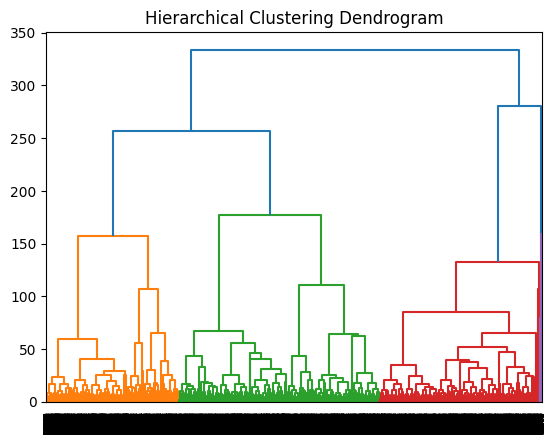

In [84]:
plot_dendrogram(sample_st_scl, 'ward', preference_metrics)

In [212]:
sample_original['st_ward4'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 4
    ).fit_predict(sample_st_scl)

In [213]:
sample_original['st_ward5'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 5
    ).fit_predict(sample_st_scl)

In [214]:
sample_original['st_ward6'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 6
    ).fit_predict(sample_st_scl)

In [215]:
sample_original['st_ward7'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 7
    ).fit_predict(sample_st_scl)

In [216]:
groupby_mean(sample_original, 'st_ward4')

st_ward4,0,1,2,3,data
beer,45.42,151.66,85.01,45.59,58.74
bottled_water,44.78,56.09,83.20,45.21,57.46
bread,29.91,256.62,30.82,20.20,28.40
meat,1.18,305.55,2.78,0.96,2.70
dairy,32.28,341.19,32.17,82.49,46.73
fresh_foods,97.67,208.24,36.56,33.69,61.03
frozen_foods,58.98,264.95,113.87,33.69,70.83
fruit_beverages,85.68,145.88,22.73,21.23,48.14
pastry,70.39,54.91,32.50,42.41,50.51
sodas,33.07,428.61,36.07,33.08,35.42


0: freshfood&fruitbeverage&pastry | 1: spenders | 2: beer&watre&frozenfood | 3: dairy&wines

In [217]:
groupby_mean(sample_original, 'st_ward5')

st_ward5,0,1,2,3,4,data
beer,151.66,45.59,85.01,45.37,45.47,58.74
bottled_water,56.09,45.21,83.20,44.74,44.81,57.46
bread,256.62,20.20,30.82,29.69,30.11,28.40
meat,305.55,0.96,2.78,1.11,1.25,2.70
dairy,341.19,82.49,32.17,34.70,30.16,46.73
fresh_foods,208.24,33.69,36.56,84.87,108.81,61.03
frozen_foods,264.95,33.69,113.87,32.43,82.09,70.83
fruit_beverages,145.88,21.23,22.73,72.67,97.01,48.14
pastry,54.91,42.41,32.50,115.29,31.31,50.51
sodas,428.61,33.08,36.07,32.65,33.43,35.42


0: spenders | 1: dairy&wines | 2: beer&watre&frozenfood | 3: pastry | 4: freshfood&fruitbeverage

In [218]:
groupby_mean(sample_original, 'st_ward6')

st_ward6,0,1,2,3,4,5,data
beer,45.59,183.87,85.01,45.37,45.47,115.42,58.74
bottled_water,45.21,53.60,83.20,44.74,44.81,58.90,57.46
bread,20.20,121.29,30.82,29.69,30.11,408.88,28.40
meat,0.96,363.73,2.78,1.11,1.25,240.10,2.70
dairy,82.49,592.82,32.17,34.70,30.16,58.10,46.73
fresh_foods,33.69,211.51,36.56,84.87,108.81,204.55,61.03
frozen_foods,33.69,369.60,113.87,32.43,82.09,147.22,70.83
fruit_beverages,21.23,179.53,22.73,72.67,97.01,108.02,48.14
pastry,42.41,60.13,32.50,115.29,31.31,49.02,50.51
sodas,33.08,663.02,36.07,32.65,33.43,164.90,35.42


0: dairy&wines | 1: spenders (dairy&sodas) | 2: beer&watre&frozenfood | 3: pastry | 4: freshfood&fruitbeverage | 5: spenders (bread)

In [219]:
groupby_mean(sample_original, 'st_ward7')

st_ward7,0,1,2,3,4,5,6,data
beer,85.01,183.87,45.80,45.37,45.47,115.42,45.45,58.74
bottled_water,83.20,53.60,45.94,44.74,44.81,58.90,44.74,57.46
bread,30.82,121.29,27.52,29.69,30.11,408.88,15.44,28.40
meat,2.78,363.73,0.75,1.11,1.25,240.10,1.09,2.70
dairy,32.17,592.82,82.38,34.70,30.16,58.10,82.57,46.73
fresh_foods,36.56,211.51,34.47,84.87,108.81,204.55,33.19,61.03
frozen_foods,113.87,369.60,32.89,32.43,82.09,147.22,34.20,70.83
fruit_beverages,22.73,179.53,21.50,72.67,97.01,108.02,21.06,48.14
pastry,32.50,60.13,60.62,115.29,31.31,49.02,30.60,50.51
sodas,36.07,663.02,33.19,32.65,33.43,164.90,33.01,35.42


0: beer&watre&frozenfood | 1: spenders (dairy&sodas) | 2: dairy&veggies&wine(pastry) | 3: pastry | 4: freshfood&fruitbeverage | 5: spenders (bread) | 6: normal(dairy)

In [236]:
clusters_comparison(sample_original, 'no_ward4', 'st_ward4')

,st_ward4 0 Cluster,st_ward4 1 Cluster,st_ward4 2 Cluster,st_ward4 3 Cluster
no_ward4 0 Cluster,8507,40,373,50
no_ward4 1 Cluster,1392,0,25,6420
no_ward4 2 Cluster,1,0,7606,90
no_ward4 3 Cluster,0,45,0,0


In [237]:
clusters_comparison(sample_original, 'no_ward6', 'st_ward6')

,st_ward6 0 Cluster,st_ward6 1 Cluster,st_ward6 2 Cluster,st_ward6 3 Cluster,st_ward6 4 Cluster,st_ward6 5 Cluster
no_ward6 0 Cluster,6420,0,25,1389,3,0
no_ward6 1 Cluster,14,0,210,2,5,40
no_ward6 2 Cluster,31,0,150,25,5266,0
no_ward6 3 Cluster,0,45,0,0,0,0
no_ward6 4 Cluster,5,0,13,3190,19,0
no_ward6 5 Cluster,90,0,7606,1,0,0


In [238]:
clusters_comparison(sample_original, 'no_ward7', 'st_ward7')

,st_ward7 0 Cluster,st_ward7 1 Cluster,st_ward7 2 Cluster,st_ward7 3 Cluster,st_ward7 4 Cluster,st_ward7 5 Cluster,st_ward7 6 Cluster
no_ward7 0 Cluster,210,0,13,2,5,40,1
no_ward7 1 Cluster,0,45,0,0,0,0,0
no_ward7 2 Cluster,150,0,4,25,5266,0,27
no_ward7 3 Cluster,22,0,1670,5,3,0,3862
no_ward7 4 Cluster,13,0,2,3190,19,0,3
no_ward7 5 Cluster,7606,0,7,1,0,0,83
no_ward7 6 Cluster,3,0,886,1384,0,0,2


##### 99%

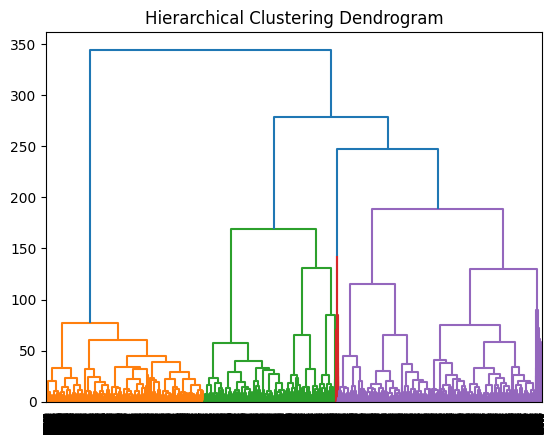

In [65]:
plot_dendrogram(sample_st_scl, 'ward', preference_metrics) # 99 outliers

In [131]:
sample_original['st_ward4'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 4
    ).fit_predict(sample_st_scl)

In [132]:
sample_original['st_ward5'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 5
    ).fit_predict(sample_st_scl)

In [133]:
sample_original['st_ward6'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 6
    ).fit_predict(sample_st_scl)

In [72]:
groupby_mean(sample_original, 'st_ward4')

st_ward4,0,1,2,3,data
beer,47.04,109.82,45.52,83.83,58.45
bottled_water,45.01,57.78,45.14,84.03,57.39
bread,30.39,206.27,20.29,29.80,28.10
meat,2.38,236.08,0.82,0.86,2.23
dairy,34.41,184.73,82.25,30.35,46.18
fresh_foods,97.47,174.51,33.67,33.26,60.69
frozen_foods,62.71,237.53,33.94,110.00,70.62
fruit_beverages,85.28,124.82,21.27,21.04,48.31
pastry,69.09,54.38,42.23,31.21,50.03
sodas,35.52,298.42,32.55,32.52,34.62


0: freshfood&fruitbeverage&lowwine | 1: spenders | 2: dairy&(wines) | 3: water&beer&frozen

In [70]:
groupby_mean(sample_original, 'st_ward5')

st_ward5,0,1,2,3,4,data
beer,45.52,109.82,48.47,83.83,45.25,58.45
bottled_water,45.14,57.78,45.32,84.03,44.63,57.39
bread,20.29,206.27,31.00,29.80,29.62,28.10
meat,0.82,236.08,3.70,0.86,0.73,2.23
dairy,82.25,184.73,34.03,30.35,34.89,46.18
fresh_foods,33.67,174.51,107.70,33.26,84.64,60.69
frozen_foods,33.94,237.53,87.22,110.00,31.96,70.62
fruit_beverages,21.27,124.82,95.52,21.04,72.43,48.31
pastry,42.23,54.38,32.80,31.21,114.61,50.03
sodas,32.55,298.42,37.29,32.52,33.30,34.62


0: dairy&(wine) | 1: spenders | 2: freshfood&fruitbeverage | 3: beer&water&frozenfood | 4: pastry&(fresh)

In [76]:
groupby_mean(sample_original, 'st_ward6')

st_ward6,0,1,2,3,4,5,data
beer,109.82,46.36,48.47,83.83,45.25,44.99,58.45
bottled_water,57.78,45.63,45.32,84.03,44.63,44.84,57.39
bread,206.27,28.55,31.00,29.80,29.62,15.13,28.10
meat,236.08,0.99,3.70,0.86,0.73,0.71,2.23
dairy,184.73,82.26,34.03,30.35,34.89,82.25,46.18
fresh_foods,174.51,35.90,107.70,33.26,84.64,32.28,60.69
frozen_foods,237.53,34.73,87.22,110.00,31.96,33.44,70.62
fruit_beverages,124.82,22.42,95.52,21.04,72.43,20.56,48.31
pastry,54.38,60.70,32.80,31.21,114.61,30.69,50.03
sodas,298.42,32.99,37.29,32.52,33.30,32.28,34.62


0: spenders | 1: dairy&wine&veggies | 2: freshfood&fruitbeverage&(frozenfood) | 3: beer&water&frozenfood | 4: pastry&(fresh) | 5: normal(dairy)

In [134]:
clusters_comparison(sample_original, 'no_ward5', 'st_ward5')

,st_ward5 0 Cluster,st_ward5 1 Cluster,st_ward5 2 Cluster,st_ward5 3 Cluster,st_ward5 4 Cluster
no_ward5 0 Cluster,6249,0,29,13,1357
no_ward5 1 Cluster,3,63,103,4,0
no_ward5 2 Cluster,102,9,76,7646,3
no_ward5 3 Cluster,41,0,84,5,3166
no_ward5 4 Cluster,25,5,5396,38,9


In [139]:
clusters_comparison(sample_original, 'st_ward6', 'st_ward5')

,st_ward5 0 Cluster,st_ward5 1 Cluster,st_ward5 2 Cluster,st_ward5 3 Cluster,st_ward5 4 Cluster
st_ward6 0 Cluster,0,77,0,0,0
st_ward6 1 Cluster,2469,0,0,0,0
st_ward6 2 Cluster,0,0,5688,0,0
st_ward6 3 Cluster,0,0,0,7706,0
st_ward6 4 Cluster,0,0,0,0,4535
st_ward6 5 Cluster,3951,0,0,0,0


### MinMax Scaler

#### 95%

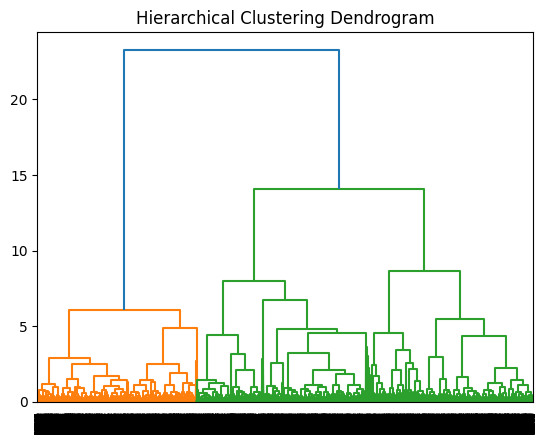

In [51]:
plot_dendrogram(sample_mm_scl, 'ward', preference_metrics)

In [220]:
sample_original['mm_ward2'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 2
    ).fit_predict(sample_mm_scl)

In [221]:
sample_original['mm_ward3'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 3
    ).fit_predict(sample_mm_scl)

In [224]:
sample_original['mm_ward5'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 5
    ).fit_predict(sample_mm_scl)

In [222]:
groupby_mean(sample_original, 'mm_ward2')

mm_ward2,0,1,data
beer,46.86,84.22,58.74
bottled_water,44.93,84.35,57.46
bread,27.63,30.03,28.40
meat,3.44,1.10,2.70
dairy,54.42,30.23,46.73
fresh_foods,73.65,33.96,61.03
frozen_foods,52.53,110.08,70.83
fruit_beverages,60.78,21.04,48.14
pastry,59.20,31.85,50.51
sodas,36.20,33.74,35.42


0: normal | 1: beer&water&frozenfood

In [223]:
groupby_mean(sample_original, 'mm_ward3')

mm_ward3,0,1,2,data
beer,45.57,84.22,48.03,58.74
bottled_water,44.81,84.35,45.03,57.46
bread,22.14,30.03,32.56,28.40
meat,1.13,1.10,5.52,2.70
dairy,75.85,30.23,35.18,46.73
fresh_foods,33.00,33.96,110.16,61.03
frozen_foods,33.85,110.08,69.31,70.83
fruit_beverages,20.92,21.04,96.57,48.14
pastry,54.65,31.85,63.29,50.51
sodas,33.10,33.74,38.98,35.42


0: normal(dairy) | 1: beer&water&frozenfood | 2: freshfood&fruitbeverage

In [226]:
groupby_mean(sample_original, 'mm_ward5')

mm_ward5,0,1,2,3,4,data
beer,49.54,84.22,45.29,46.14,45.38,58.74
bottled_water,45.26,84.35,44.57,45.30,44.62,57.46
bread,34.18,30.03,19.11,28.33,29.73,28.40
meat,8.13,1.10,0.86,1.68,0.95,2.70
dairy,38.02,30.23,72.61,82.45,30.21,46.73
fresh_foods,111.71,33.96,32.34,34.36,107.45,61.03
frozen_foods,90.24,110.08,33.73,34.08,32.61,70.83
fruit_beverages,97.33,21.04,20.46,21.86,95.25,48.14
pastry,32.92,31.85,52.21,59.62,116.57,50.51
sodas,42.57,33.74,32.85,33.62,32.68,35.42


0: freshfood&fruitbeverage | 1: beer&water&frozenfood | 2: normalI(dairy) | 3: dairy&veggies&wines | 4: freshfoods&fruitbeverage&pastry

#### 99%

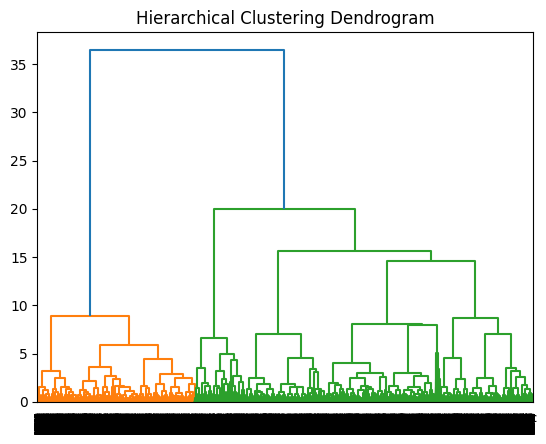

In [66]:
plot_dendrogram(sample_mm_scl, 'ward', preference_metrics) # 99 outliers

In [114]:
sample_original['mm_ward2'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 2
    ).fit_predict(sample_mm_scl)

In [115]:
sample_original['mm_ward3'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 3
    ).fit_predict(sample_mm_scl)

In [116]:
sample_original['mm_ward5'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 5
    ).fit_predict(sample_mm_scl)

In [117]:
groupby_mean(sample_original, 'mm_ward2')

mm_ward2,0,1,data
beer,46.55,84.09,58.45
bottled_water,44.93,84.27,57.39
bread,27.17,30.11,28.10
meat,2.66,1.30,2.23
dairy,53.46,30.49,46.18
fresh_foods,73.26,33.57,60.69
frozen_foods,52.24,110.25,70.62
fruit_beverages,60.91,21.14,48.31
pastry,58.77,31.19,50.03
sodas,35.17,33.42,34.62


In [118]:
groupby_mean(sample_original, 'mm_ward3')

mm_ward3,0,1,2,data
beer,46.65,84.09,45.99,58.45
bottled_water,44.87,84.27,45.28,57.39
bread,27.06,30.11,27.80,28.10
meat,2.80,1.30,1.85,2.23
dairy,48.17,30.49,83.34,46.18
fresh_foods,80.23,33.57,33.88,60.69
frozen_foods,55.42,110.25,34.25,70.62
fruit_beverages,67.89,21.14,21.51,48.31
pastry,58.48,31.19,60.45,50.03
sodas,35.47,33.42,33.49,34.62


In [119]:
groupby_mean(sample_original, 'mm_ward5')

mm_ward5,0,1,2,3,4,data
beer,84.09,45.39,45.99,45.13,48.74,58.45
bottled_water,84.27,44.63,45.28,44.86,45.07,57.39
bread,30.11,29.77,27.80,15.69,32.74,28.10
meat,1.30,1.24,1.85,0.82,5.45,2.23
dairy,30.49,35.33,83.34,82.02,35.14,46.18
fresh_foods,33.57,85.32,33.88,32.26,109.41,60.69
frozen_foods,110.25,33.49,34.25,34.47,87.92,70.62
fruit_beverages,21.14,73.12,21.51,20.43,96.59,48.31
pastry,31.19,114.57,60.45,30.77,31.83,50.03
sodas,33.42,33.75,33.49,32.68,38.82,34.62


0: beer&water&frozenfood | 1: pastry&(freshfood) | 2: dairy&wines&veggies | 3: normal&dairy | 4: freshfood&fruitbeverage

In [137]:
clusters_comparison(sample_original, 'mm_ward5', 'st_ward5')

,st_ward5 0 Cluster,st_ward5 1 Cluster,st_ward5 2 Cluster,st_ward5 3 Cluster,st_ward5 4 Cluster
mm_ward5 0 Cluster,21,6,64,7646,2
mm_ward5 1 Cluster,41,0,99,1,4475
mm_ward5 2 Cluster,2416,1,32,6,55
mm_ward5 3 Cluster,3864,3,16,36,1
mm_ward5 4 Cluster,78,67,5477,17,2


In [138]:
clusters_comparison(sample_original, 'mm_ward5', 'no_ward5')

,no_ward5 0 Cluster,no_ward5 1 Cluster,no_ward5 2 Cluster,no_ward5 3 Cluster,no_ward5 4 Cluster
mm_ward5 0 Cluster,15,31,7645,7,41
mm_ward5 1 Cluster,1336,4,7,3242,27
mm_ward5 2 Cluster,2458,14,20,10,8
mm_ward5 3 Cluster,3782,4,109,16,9
mm_ward5 4 Cluster,57,120,55,21,5388


### Robust Scaler

#### 95%

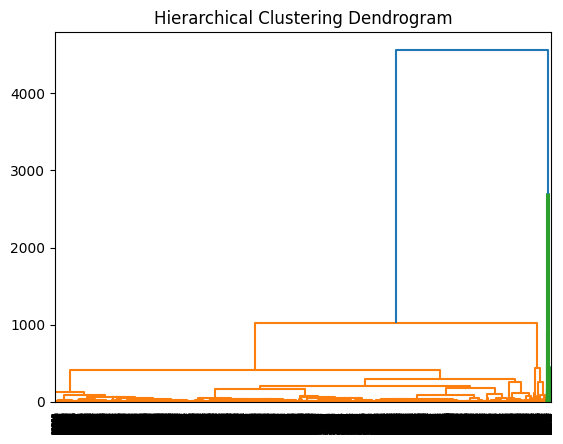

In [52]:
plot_dendrogram(sample_rb_scl, 'ward', preference_metrics)

In [227]:
sample_original['rb_ward2'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 2
    ).fit_predict(sample_rb_scl)

In [228]:
sample_original['rb_ward3'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 3
    ).fit_predict(sample_rb_scl)

In [229]:
sample_original['rb_ward4'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 4
    ).fit_predict(sample_rb_scl)

In [233]:
groupby_mean(sample_original, 'rb_ward2')

rb_ward2,0,1,data
beer,115.49,58.38,58.74
bottled_water,58.29,57.45,57.46
bread,142.27,27.67,28.40
meat,259.62,1.05,2.70
dairy,244.46,45.47,46.73
fresh_foods,197.19,60.16,61.03
frozen_foods,243.48,69.73,70.83
fruit_beverages,127.21,47.64,48.14
pastry,55.79,50.47,50.51
sodas,265.20,33.95,35.42


0: spenders | 1: normal

In [234]:
groupby_mean(sample_original, 'rb_ward3')

rb_ward3,0,1,2,data
beer,106.14,58.38,164.48,58.74
bottled_water,59.21,57.45,53.52,57.46
bread,124.08,27.67,237.60,28.40
meat,193.00,1.05,608.68,2.70
dairy,206.26,45.47,444.64,46.73
fresh_foods,187.69,60.16,246.92,61.03
frozen_foods,223.49,69.73,348.24,70.83
fruit_beverages,113.06,47.64,201.36,48.14
pastry,57.25,50.47,48.16,50.51
sodas,218.15,33.95,511.72,35.42


0: spenders | 1: normal | 2: spenders

In [235]:
groupby_mean(sample_original, 'rb_ward4')

rb_ward4,0,1,2,3,data
beer,58.38,97.52,164.48,128.03,58.74
bottled_water,57.45,61.07,53.52,54.46,57.46
bread,27.67,93.37,237.60,202.08,28.40
meat,1.05,141.69,608.68,323.35,2.70
dairy,45.47,160.73,444.64,321.92,46.73
fresh_foods,60.16,166.21,246.92,242.27,61.03
frozen_foods,69.73,208.16,348.24,262.43,70.83
fruit_beverages,47.64,107.40,201.36,127.43,48.14
pastry,50.47,56.48,48.16,59.22,50.51
sodas,33.95,181.21,511.72,312.00,35.42


0: normal | 1,2,3: spenders

#### 99%

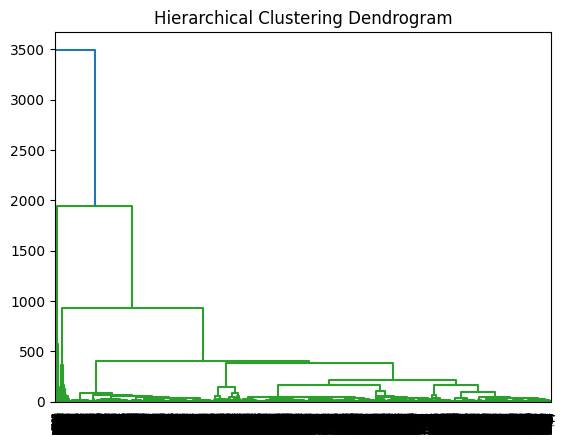

In [67]:
plot_dendrogram(sample_rb_scl, 'ward', preference_metrics) # 99 outliers

In [102]:
sample_original['rb_ward2'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 2
    ).fit_predict(sample_rb_scl)

In [103]:
sample_original['rb_ward3'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 3
    ).fit_predict(sample_rb_scl)

In [104]:
sample_original['rb_ward4'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 4
    ).fit_predict(sample_rb_scl)

In [105]:
groupby_mean(sample_original, 'rb_ward2')

rb_ward2,0,1,data
beer,58.36,115.32,58.45
bottled_water,57.39,57.65,57.39
bread,27.96,125.54,28.10
meat,1.61,407.81,2.23
dairy,45.85,263.97,46.18
fresh_foods,60.49,193.16,60.69
frozen_foods,70.28,294.08,70.62
fruit_beverages,48.16,148.76,48.31
pastry,50.01,62.92,50.03
sodas,34.08,390.24,34.62


In [106]:
groupby_mean(sample_original, 'rb_ward3')

rb_ward3,0,1,2,data
beer,115.32,58.24,82.59,58.45
bottled_water,57.65,57.41,54.67,57.39
bread,125.54,27.62,94.04,28.10
meat,407.81,0.99,125.34,2.23
dairy,263.97,45.47,121.27,46.18
fresh_foods,193.16,60.11,134.97,60.69
frozen_foods,294.08,69.83,158.98,70.62
fruit_beverages,148.76,47.88,103.03,48.31
pastry,62.92,49.99,54.00,50.03
sodas,390.24,33.56,137.15,34.62


In [107]:
groupby_mean(sample_original, 'rb_ward4')

rb_ward4,0,1,2,3,data
beer,58.24,90.93,82.59,130.17,58.45
bottled_water,57.41,59.50,54.67,56.52,57.39
bread,27.62,156.21,94.04,106.87,28.10
meat,0.99,560.86,125.34,314.65,2.23
dairy,45.47,201.43,121.27,302.04,46.18
fresh_foods,60.11,238.86,134.97,165.35,60.69
frozen_foods,69.83,330.86,158.98,271.70,70.62
fruit_beverages,47.88,151.50,103.03,147.09,48.31
pastry,49.99,65.21,54.00,61.52,50.03
sodas,33.56,442.43,137.15,358.48,34.62


This dendrogram was only plotted to confirm that robust scaler tended to produce poor results. The assumption that it produces one cluster containing the majority of datapoints and other small clusters, was confirmed, once again.

----------------------

## UMAP

In [165]:
umap_object = umap.UMAP(random_state=4)

In [166]:
umap_embedding = umap_object.fit_transform(sample_no_scl)

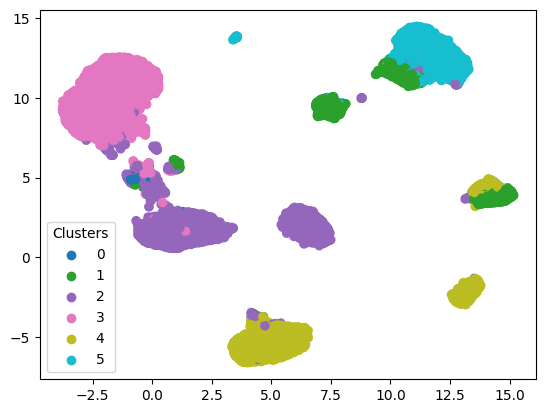

In [163]:
visualize_dimensionality_reduction(umap_embedding, sample_original['st_ward6'])

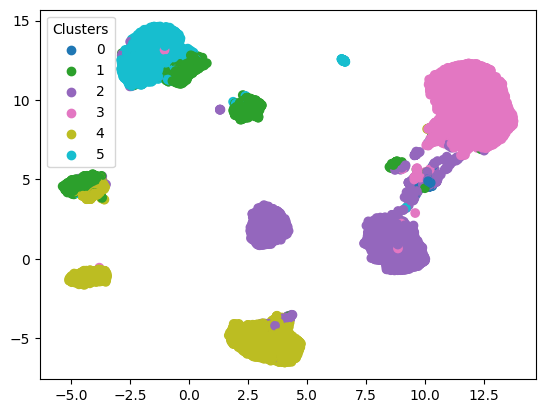

In [167]:
visualize_dimensionality_reduction(umap_embedding, sample_original['st_ward6']) # rs4

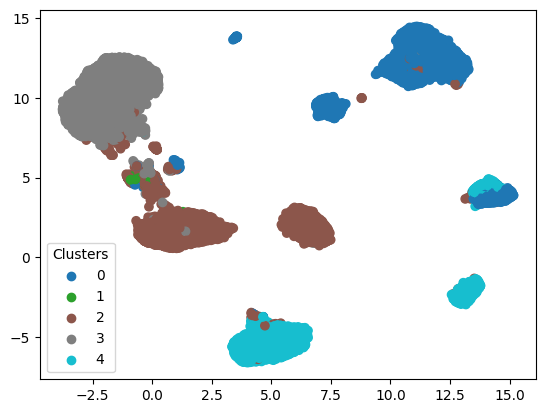

In [164]:
visualize_dimensionality_reduction(umap_embedding, sample_original['st_ward5'])

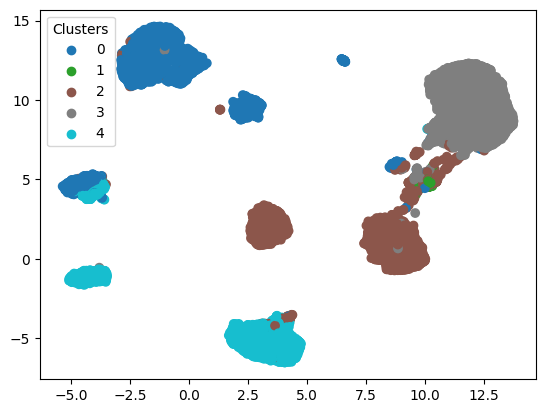

In [168]:
visualize_dimensionality_reduction(umap_embedding, sample_original['st_ward5']) # rs4

In [171]:
smp = preference.sample(frac=0.2, random_state=1)

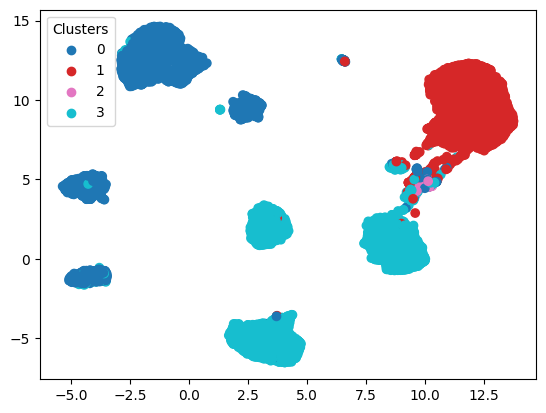

In [172]:
visualize_dimensionality_reduction(umap_embedding, smp['st_kmeans4'])

--------

## Cenas anigas

c:\Users\ritaf\Documentos\Estudos\NovaIMS\Mestrado_GIBI\DM_I\Project_Git\DMI\utils2.py:202: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles = [plt.scatter([], [], c=cmap(norm(i)), label=label) for i, label in enumerate(labels)]


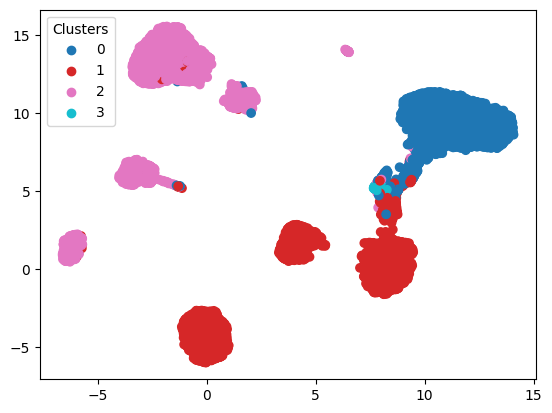

In [22]:
visualize_dimensionality_reduction(umap_embedding, smp_orig['st_kmeans4'])

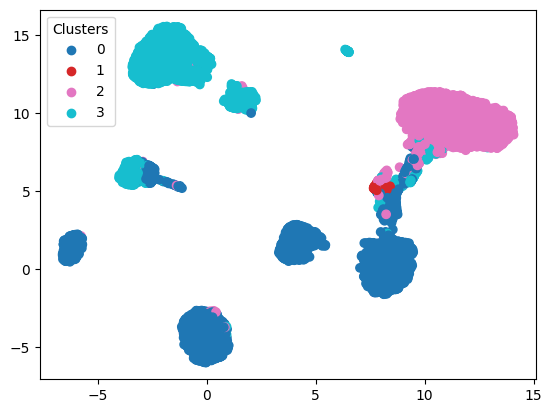

In [60]:
visualize_dimensionality_reduction(umap_embedding, smp_orig['st_ward4'])

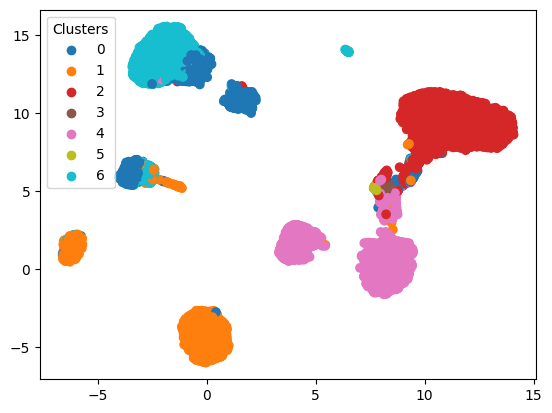

In [ ]:
visualize_dimensionality_reduction(umap_embedding, smp_orig['st_kmeans7'])

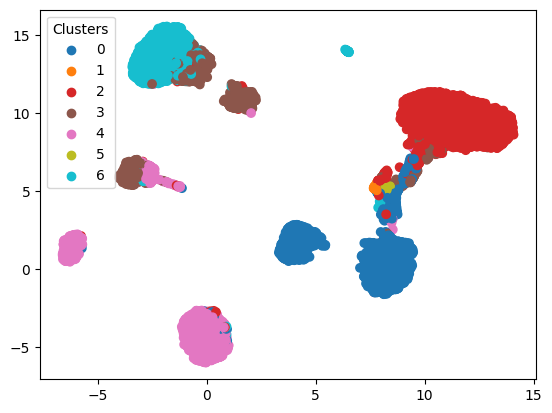

In [61]:
visualize_dimensionality_reduction(umap_embedding, smp_orig['st_ward7'])

# Demographic Clustering

In [179]:
demographic

,frequency_items,potencial_score,zip_code,longevity_months,credit_factor,relevance_criteria,recency_in_weeks,returns,flaged,promotional_percentage
0,38,-0.40,0,23,0.7,Priority,15,0,0,20
1,50,-0.30,0,24,0.7,Priority,10,0,0,36
2,48,1.60,0,32,0.7,Priority,20,0,0,0
3,46,-0.90,0,12,1.0,Priority,14,0,0,36
4,31,31.61,8,10,0.7,Priority,12,0,0,10
...,...,...,...,...,...,...,...,...,...,...
122124,51,0.10,0,25,0.7,Priority,9,6,0,0
122125,42,30.99,8,23,0.7,Priority,15,0,0,0
122126,24,79.76,8,29,0.7,Priority,13,0,0,13
122127,29,0.50,0,14,0.7,Priority,11,0,0,0


In [193]:
def get_ohc_df(df, feats):
  # Use OneHotEncoder to encode the categorical features.
  # Get feature names and create a DataFrame
  # with the one-hot encoded categorical features (pass feature names)

  ohc = OneHotEncoder(sparse_output=False, drop="first")
  ohc_feat = ohc.fit_transform(df[feats])
  ohc_feat_names = ohc.get_feature_names_out()
  ohc_df = pd.DataFrame(ohc_feat, index=df.index, columns=ohc_feat_names)

  # Reassigning df to contain ohc variables
  df_ohc = pd.concat([df, ohc_df], axis=1)

  return df_ohc, ohc

demographic, ohc = get_ohc_df(demographic, ['relevance_criteria'])

demographic

,frequency_items,potencial_score,zip_code,longevity_months,credit_factor,relevance_criteria,recency_in_weeks,returns,flaged,promotional_percentage,relevance_criteria_Priority,relevance_criteria_Unknown
0,38,-0.40,0,23,0.7,Priority,15,0,0,20,1.0,0.0
1,50,-0.30,0,24,0.7,Priority,10,0,0,36,1.0,0.0
2,48,1.60,0,32,0.7,Priority,20,0,0,0,1.0,0.0
3,46,-0.90,0,12,1.0,Priority,14,0,0,36,1.0,0.0
4,31,31.61,8,10,0.7,Priority,12,0,0,10,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
122124,51,0.10,0,25,0.7,Priority,9,6,0,0,1.0,0.0
122125,42,30.99,8,23,0.7,Priority,15,0,0,0,1.0,0.0
122126,24,79.76,8,29,0.7,Priority,13,0,0,13,1.0,0.0
122127,29,0.50,0,14,0.7,Priority,11,0,0,0,1.0,0.0


In [194]:
demographic.drop(columns=['relevance_criteria'], inplace=True)

In [195]:
dem_no_scl = demographic.copy()
dem_st_scl = standard.fit_transform(demographic)
dem_mm_scl = minmax.fit_transform(demographic)
dem_rb_scl = robust.fit_transform(demographic)

In [196]:
demographic_no_scl = demographic.copy()
demographic_no_scl[demographic_metrics] = pref_no_scl

demographic_st_scl = demographic.copy()
demographic_st_scl[demographic_metrics] = pref_st_scl

demographic_mm_scl = demographic.copy()
demographic_mm_scl[demographic_metrics] = pref_mm_scl

demographic_rb_scl = demographic.copy()
demographic_rb_scl[demographic_metrics] = pref_rb_scl

ValueError: Columns must be same length as key

In [191]:
kmeans = KMeans(init='k-means++', n_init=10, random_state=1)

hierarchical = AgglomerativeClustering(metric='euclidean')

In [192]:
sample_original = df_ohc.sample(frac=0.2, random_state=1)
sample_no_scl = dem_no_scl.sample(frac=0.2, random_state=1)
sample_st_scl = dem_mm_scl.sample(frac=0.2, random_state=1)
sample_mm_scl = dem_mm_scl.sample(frac=0.2, random_state=1)
sample_rb_scl = dem_rb_scl.sample(frac=0.2, random_state=1)

AttributeError: 'numpy.ndarray' object has no attribute 'sample'

In [ ]:



pref_no_r2_scores = get_r2_df(sample_no_scl, preference_metrics, kmeans, hierarchical)
pref_no_r2_scores



plot_r2_scores(pref_no_r2_scores)